#**Ted Talk Views Prediction**
---

###**TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.**

---
###**Features information:**
###The dataset contains features like:

* **talk_id**: Talk id number provided by TED
* **title**: Title of the talk
* **speaker_1**: First speaker in TED's speaker list
* **all_speakers**: Speakers in the talk
* **occupations**: Occupations of the speakers
* **about_speakers**: Blurb about each speaker
* **recorded_date**: Date the talk was recorded
* **published_date**: Date the talk was published to TED.com
* **event**: Event or medium in which the talk was given
* **native_lang**: Language the talk was given in
* **available_lang**: All available languages for a talk
* **comments**: Comments
* **duration**: Duration in seconds
* **topics**:  Topics for the talk
* **related_talks**: Related talks 
* **url**: URL of the talk
* **description**: Description of the talk
* **transcript**: Transcript of the talk
--- 

###**Target(Dependent) Variable:**
* **'views'**: It's count
---
###**Goal: The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**

#**Project Workflow**
---

1. Importing Libraries

2. Loading the Dataset

3. EDA on features 

4. Feature Engineering

5. Data Cleaning

6. Feature selection

7. Fitting the regression models and HyperParameter Tuning

8. Comparison of Models

9. Final selection of the model

10. Conclusion
--- 





#**1. Importing Libraries**

In [ ]:
#import the required libraries
import pandas as pd
import numpy as np
from datetime import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
import xgboost as xgb



import warnings
warnings.filterwarnings('ignore')

**Now, we have imported the libraries so let's proceed to loading of the dataset.**

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**2. Loading the dataset**

In [ ]:
#loading the dataset and creating dataframe variable
path='/content/drive/MyDrive/Almabetter/TED Talks Views Prediction/data_ted_talks.csv'
df=pd.read_csv(path)

#**3.Exploratory Data Analysis**

In [ ]:
#checking the entries and columns in dataset
df.shape

(4005, 19)

Dataset have 4005 entries and 19 columns

In [ ]:
#let's check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

From above observation, we can see that only three integer columns are there in dataset. other columns contains categorical or textual data.
So, we have to general some numerical column data for these columns.

In [ ]:
#printing the head of the dataset
df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."


##**3.1 Null values in the dataset**

In [ ]:
#let's check for the NaN values
df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

Occupations, about_speakers, comments and recorded_date column contains the NaN 

---

values

We can't get any input from url column for predicting the model. 

So, We can drop the url column

In [ ]:
#drop the url column
df=df.drop(columns=['url'])

##**3.2 speaker_1 column**

Speaker of top 5 most viewed videos

In [ ]:
#data top 5 most watched videos
pop_df=df.nlargest(5, ['views'])
pop_df[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability


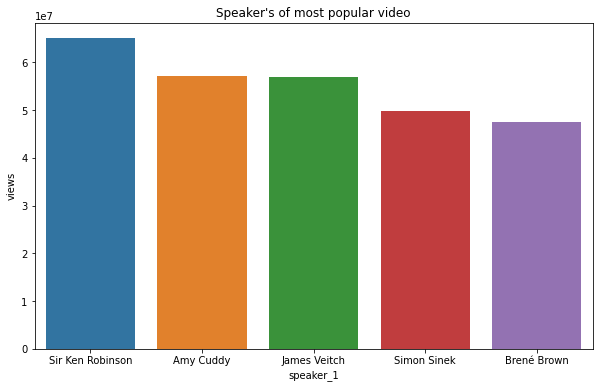

In [ ]:
#let's check on plot
plt.figure(figsize=(10,6))
plt.title("Speaker's of most popular video")
sns.barplot(x='speaker_1',y='views',data=pop_df)

Sir Ken Robinson's videos are most viewed followed by Amy Cuddy.

We will find the most popular speaker by taking reference of views column

In [ ]:
#finding most popular speaker from the dataset
pop_speaker_df=df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(15,['views'])
pop_speaker_df.reset_index(inplace=True)
pop_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


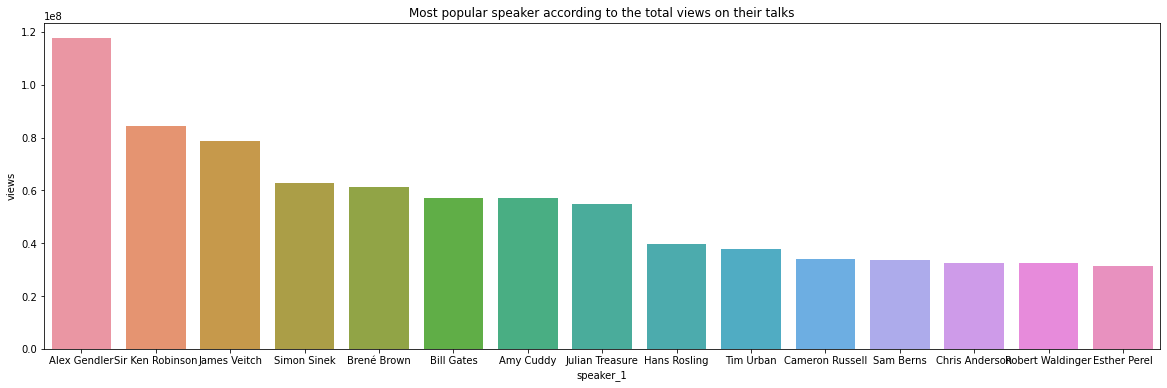

In [ ]:
#let's plot 
plt.figure(figsize=(20,6))
plt.title('Most popular speaker according to the total views on their talks')
sns.barplot(x='speaker_1',y='views',data=pop_speaker_df)

* We can see Alex Gendler is the most popular speaker followed by Sir Ken Robinson.

##**3.3 event column.**

Let's check the most frequent event categories

In [ ]:
#let's explore the most frequent event categories
freq_event_df=df[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
freq_event_df.reset_index(inplace=True)
freq_event_df

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


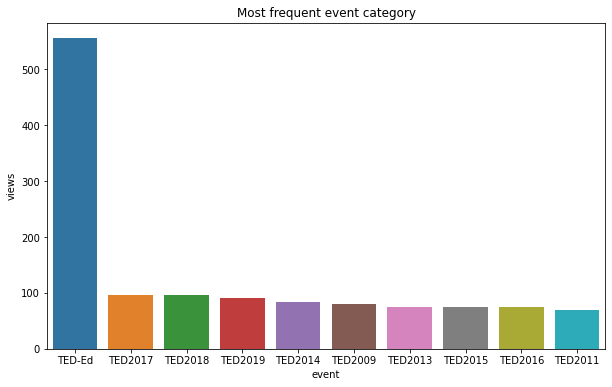

In [ ]:
#let's plot it
plt.figure(figsize=(10,6))
plt.title('Most frequent event category')
sns.barplot(x='event',y='views',data=freq_event_df)

TED-Ed is the most frequent event category followed by TED2017 and TED2018

Let's find the most popular event categories

In [ ]:
#let's explore the most popular event categories
pop_event_df=df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
pop_event_df.reset_index(inplace=True)

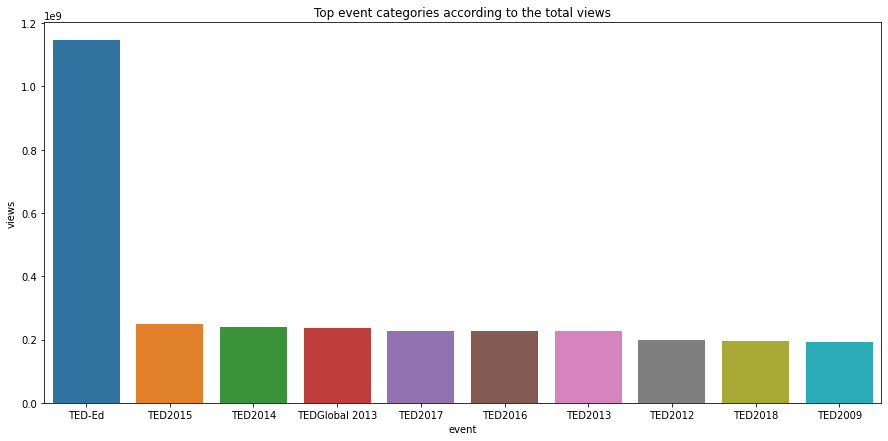

In [ ]:
#let's plot it
plt.figure(figsize=(15,7))
plt.title('Top event categories according to the total views')
sns.barplot(x='event',y='views',data=pop_event_df)

TED-Ed is the most popular event category followed by TED2015.

##**3.4 native_lang column**

In [ ]:
#let's check which language is used most
df.native_lang.value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

We can see from above, en is the most language used here.

So, There will be no impact if we skip this column.

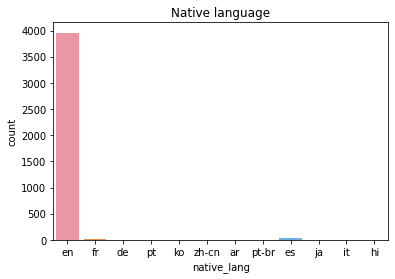

In [ ]:
#let's check it by plotting
plt.title('Native language')
sns.countplot(df['native_lang'])

In [ ]:
#Let's drop native_lang column
df.drop(columns='native_lang',inplace=True)

##**3.5 title column**

In [ ]:
#import the wordcloud to find out the most frequent used words
from wordcloud import WordCloud,ImageColorGenerator

There are total 157160 words in the combination of all titles.


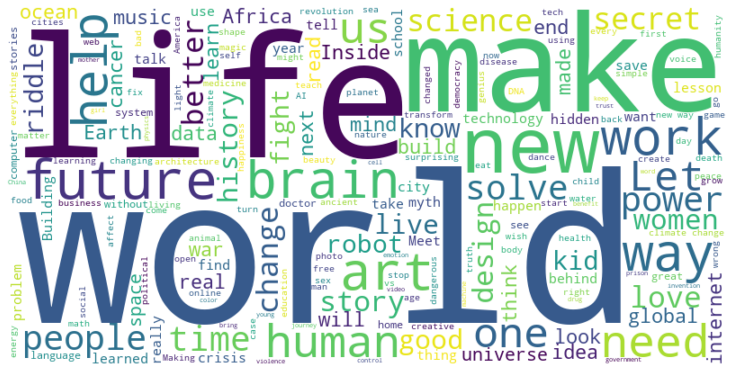

In [ ]:
#let's generate word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are total {} words in the combination of all titles.".format(len(text)))

# Generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Majoriity of Titles contains words like life, world, make, new, future, art, way, let.

There are 404126 words in the combination of all topics.


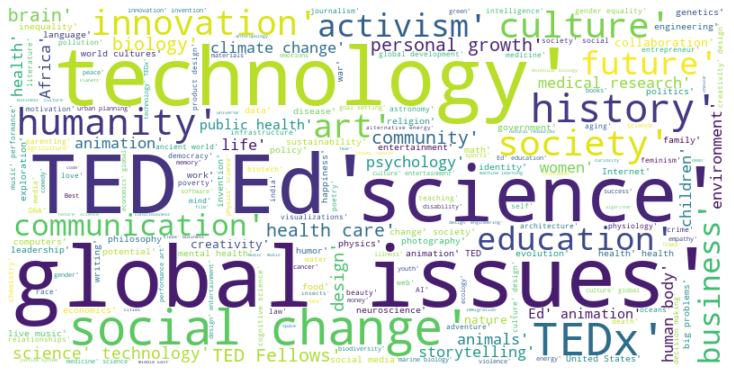

In [ ]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##**3.7 occupation column.**

In [ ]:
#counting the null values
df['occupations'].isna().sum()

0

As we can see, There are total 522 null values.

In [ ]:
#replacing Nan values with other 
for index, row in df.iterrows():
    if pd.isnull(row['occupations']):
        df['occupations'][index] = str({0:'Other'})

In [ ]:
#apply eval function on occupations column
df['occupations'] = df.apply(lambda row: eval(row['occupations']), axis=1)

TypeError: ignored

In [ ]:
#defining a new feature called occupation
df['occupation'] = 'other'
#iterating through the each row and extracting occupations of speakers
for index, row in df.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    df.loc[index,'occupation'] = str(occup_list)

In [ ]:
#Checking the length of unique occupation in event column.
len(df['occupation'].unique())

* **Now we have 1552 unique entries in the event column.**

In [ ]:
#Printing the top 15 most frequent speaker's occupations
occ_df=df[df['occupation']!='O']
fig,ax=plt.subplots(figsize=(17,5))
a=sns.barplot(x=occ_df['occupation'].value_counts(ascending=False).head(15).index, 
              y=occ_df['occupation'].value_counts(ascending=False).head(15).values, ax=ax)
a.set(title="top 15 most frequent speaker's occupations")

In [ ]:
#printing the value_counts of occupation column
occ_df['occupation'].value_counts().head(8)

* **Most of the speakers are writer folowed by author and journalist.**

**Let's make the world cloud for occupations column.**

In [ ]:
#joining the texts
text = " ".join(occ for occ in occ_df.occupation.astype(str))
print ("There are {} words in the combination of all occupations.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##**3.8 published_date column**

In [ ]:
#apply the strptime 
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

TypeError: ignored

In [ ]:
#we will extract the release day, month and year from the published date column
df['release_day'] = df['published_date'].apply(lambda x: x.weekday())
df['release_month']=df['published_date'].apply(lambda x: x.month)
df['release_year'] = df['published_date'].apply(lambda x: x.year)

There are 3 seperate columns as follows:

release_day

release_month

release_year

In [ ]:
#mapping in release_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['release_day']=df['release_day'].map(week_day)

###**release_day column.**

let's check the day having maximum release date.

In [ ]:
#The day of the month having maximum release date 
freq_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
freq_rel_day

,release_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


Text(0.5, 1.0, 'Most frequent release days')

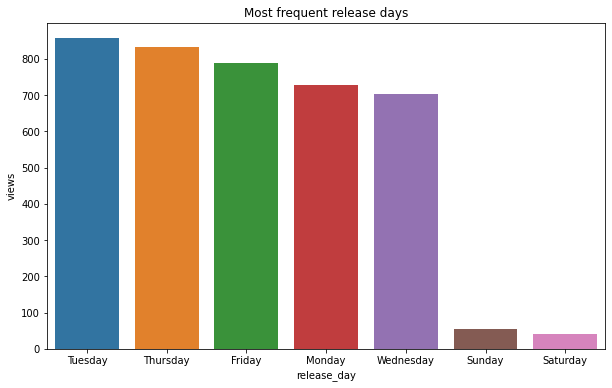

In [ ]:
#  let's plot it
plt.figure(figsize=(10,6))
sns.barplot(x='release_day',y='views',data=freq_rel_day)
plt.title('Most frequent release days')

###**release_month column**

In [ ]:
#mapping in release_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['release_month']=df['release_month'].map(month_dict)

Text(0.5, 1.0, 'Most frequent release months')

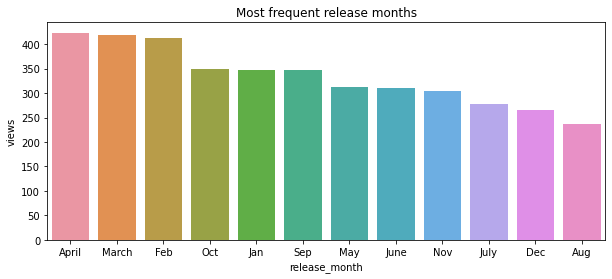

In [ ]:
#checking the months having maximum release 
freq_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)

# checking the months having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x='release_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

Maximum videos are released in April followed by March and Feb.

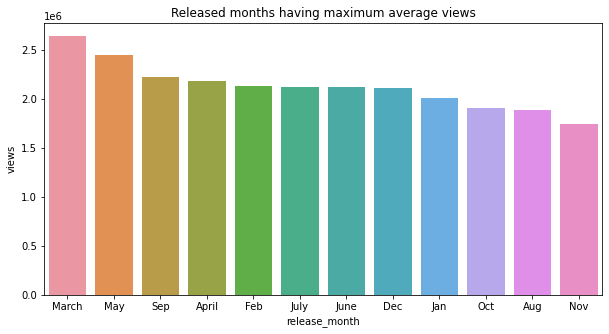

In [ ]:
#Printing the most popular release month according to average Views
pop_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)

plt.figure(figsize=(10,5))
plt.title('Released months having maximum average views')
sns.barplot(x='release_month',y='views',data=pop_rel_month)

###**release_year column.**

Text(0.5, 1.0, 'Most frequent release years')

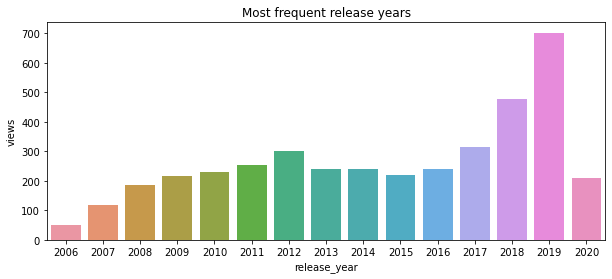

In [ ]:
#let's check the years having maximum release 
freq_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)
#Plotting of the years having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x='release_year',y='views',data=freq_rel_year)
plt.title('Most frequent release years')

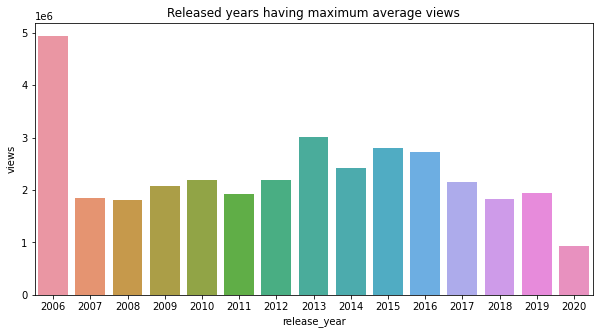

In [ ]:
#Printing the most popular release years according to AVERAGE Views
pop_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)

plt.figure(figsize=(10,5))
plt.title('Released years having maximum average views')
sns.barplot(x='release_year',y='views',data=pop_rel_year)

Most of the videos are published in 2019 followed by 2018 and 2017.


##**Plotting of some numerical data columns.**

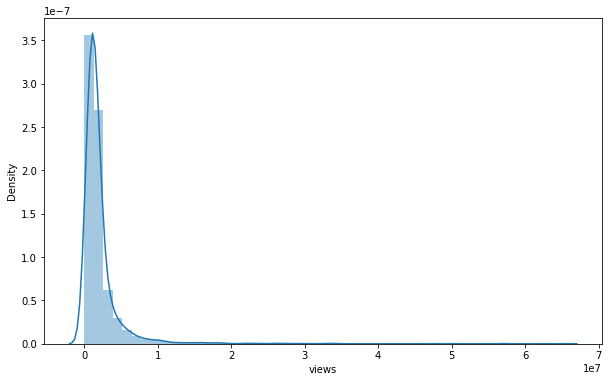

In [ ]:
#plotting the distplot of tareget variable
plt.figure(figsize=(10,6))
sns.distplot(df['views'])

Here we can see that, our target variable is rightly skewed.

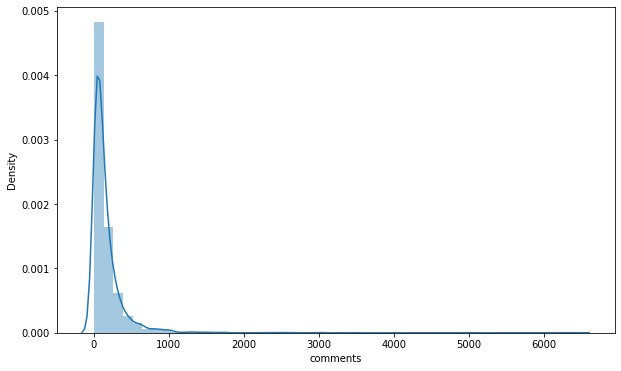

In [ ]:
##plot the distplot of comments
plt.figure(figsize=(10,6))
sns.distplot(df['comments'])

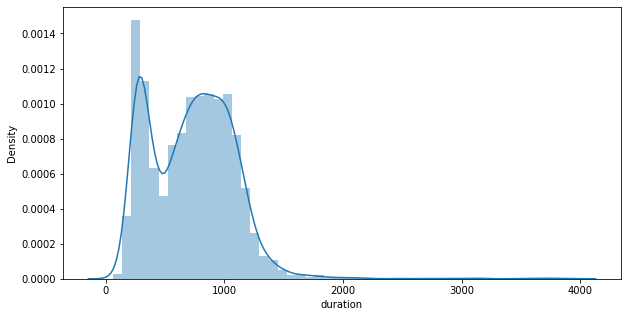

In [ ]:
#plot the distplot of duration
plt.figure(figsize=(10,5))
sns.distplot(df['duration'])

#**4.Feature Engineering**

### All machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristics to work properly. Here, the need for feature engineering arises. Feature engineering mainly have two goals:

* Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
* Improving the performance of machine learning models.

We'll try adding and removing some features in this section in order to make a perfect data matrix we can pass to a machine learning model. We will try to interpret categorical features as numeric to be passed to the ML models.

###**4.1 Feature Engineering on Speaker_1 column**

Target encoding is the process of replacing a categorical value with the mean of the target variable. 
Any non-categorical columns are automatically dropped by the target encoder model. 
We will use target encoding for this column.

In [ ]:
#target encoding on speaker_1 column
pop_speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(pop_speaker)

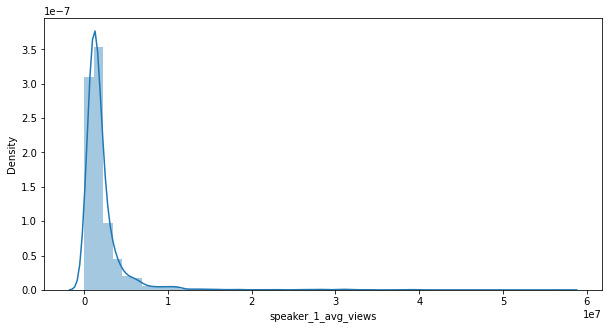

In [ ]:
#plot the speaker_1_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])

###**4.2 Feature Engineering on event column**

In [ ]:
#let's find the unique events from the event column.
event_list=list(df.event.unique())
len(event_list)

459

In [ ]:
#target encoding on event column
pop_event=df.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_event=pop_event.to_dict()
pop_event=pop_event.values()
pop_event=  list(pop_event)[0]
df['event_wise_avg_views']=df['event'].map(pop_event)

We can drop the event column now as we have done target encoding.

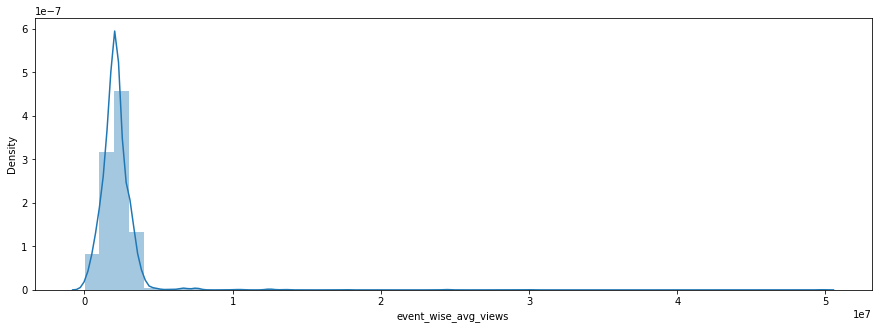

In [ ]:
#Plot the distplot of event_wise_avg_views
sns.distplot(df['event_wise_avg_views'])

In [ ]:
#dropping the event column
df=df.drop(columns='event')

###**4.3 Feature Engineering on available_lang column**

**In available_lang column we have a list of available languages for each video.**

In [ ]:
#apply the eval function on available_lang column
df['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)

In [ ]:
len(df['available_lang'][10])

168

We will add a new feature which counts the total no of languages for a particular video.

In [ ]:
df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

In [ ]:
#drop the available_lang column
df.drop(columns='available_lang',inplace=True)

KeyError: ignored

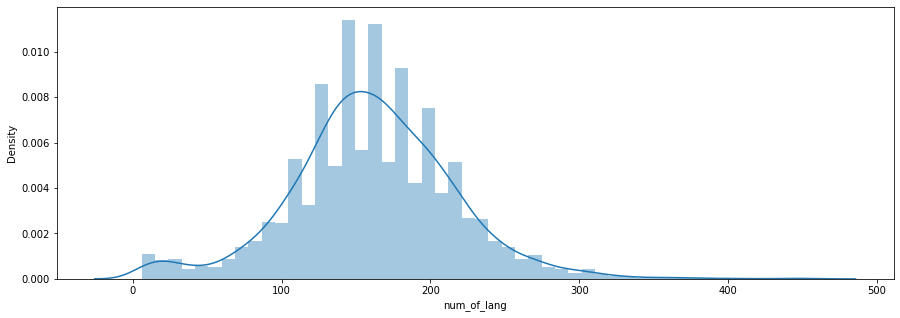

In [ ]:
sns.distplot(df['num_of_lang'])

###**4.4 Feature Engineering on topics column**

In [ ]:
df['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

In [ ]:
df['topics'] = df.apply(lambda row: eval(row['topics']), axis=1)

We will add a new feature which counts of total number of topics for a particular video.

In [ ]:
df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)

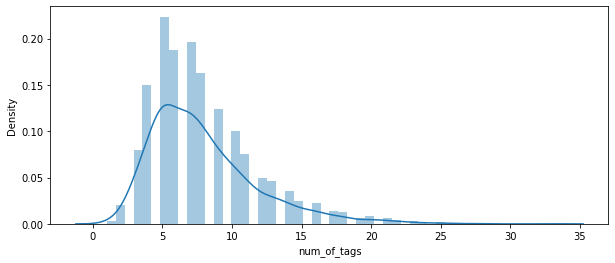

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(df['num_of_tags'])

We will do target encoding on topics column.

In [ ]:
df['topics'][1]

['Africa',
 'Asia',
 'Google',
 'demo',
 'economics',
 'global issues',
 'health',
 'statistics',
 'global development',
 'visualizations',
 'math']

In [ ]:
#extracting the unique topics from topics list of each talk
unique_topics=[]
for i in range(0,len(df)):
  temp=df['topics'][i]
  for ele in temp:
    if(ele not in unique_topics):
      unique_topics.append(ele)
      
len(unique_topics)

457

In [ ]:
#fetching the avg views with respect to each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [ ]:
#let's store the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
df['topics_wise_avg_views'] = se.values

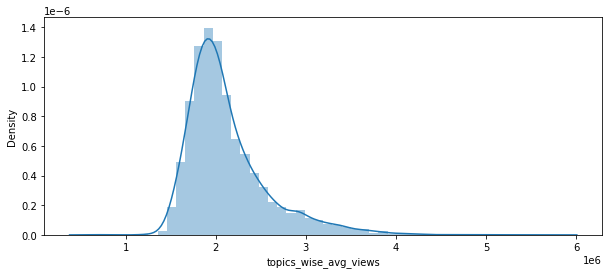

In [ ]:
#plot th topics_wise_avg_views
plt.figure(figsize=(10,4))
sns.distplot(df['topics_wise_avg_views'])

###**4.5 Feature Engineering on published_date column.**

Here, We can add a new feature called as video_age. Which will describe the difference between current year and published year.

In [ ]:
df['video_age']=2021-df['release_year']

No need of published_date column, We can drop it.

In [ ]:
df=df.drop(columns='published_date')

###**4.6 Feature Engineering on related_talks column.**

In [ ]:
#apply the eval function on available_lang column
df['related_talks'] = df.apply(lambda row: eval(row['related_talks']), axis=1)

In [ ]:
df['related_talks'][0]

{243: 'New thinking on the climate crisis',
 547: 'The business logic of sustainability',
 2093: 'The state of the climate — and what we might do about it',
 2339: "Climate change is happening. Here's how we adapt",
 29968: 'The most important thing you can do to fight climate change: talk about it',
 54715: 'How we can turn the tide on climate'}

From above, we can see related_talks column contains a dictonary with six attributes in which talk_id is a key and talk title as a value.

We can make a new feature as related_views by taking mean of those six related talks.

In [ ]:
#creating a new feature called related_views
df['related_views'] = 0
#iterate through each row and extracting value of related_talks
for index, row in df.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(df)):
      if (df.loc[i,'talk_id']) in id_list:
        temp+=df.loc[i,'views']

    df.loc[index,'related_views']=temp//6

**Let's plot the related_views column.**

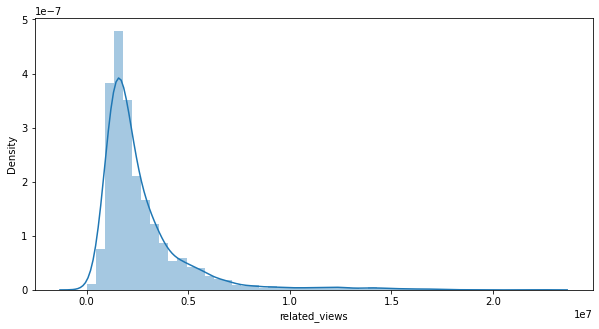

In [ ]:
#plotting the related_views column
plt.figure(figsize=(10,5))
sns.distplot(df['related_views'])

In [ ]:
#creating a copy of the dataframe
gf=df.copy()

In [ ]:
df=gf.copy()

#**5. Data Cleaning.**

##**5.1 Outlier Treatment on numerical columns.**

In [ ]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

about_speakers             0
all_speakers               0
comments                 261
description                0
duration                  21
event_wise_avg_views     156
num_of_lang              143
num_of_tags              116
occupation                 0
occupations                0
recorded_date              0
related_talks              0
related_views            300
release_day                0
release_month              0
release_year               0
speaker_1                  0
speaker_1_avg_views      373
talk_id                  119
title                      0
topics                     0
topics_wise_avg_views    242
transcript                 0
video_age                  0
views                    393
dtype: int64

As we can see we have outliers in some columns. We will put extreme value for the outliers.

In [ ]:
# Replace the outliers with extreme values
for i in ['comments','duration','num_of_lang','num_of_tags','related_views','views','speaker_1_avg_views','topics_wise_avg_views','event_wise_avg_views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

In [ ]:
#verifying again
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

about_speakers             0
all_speakers               0
comments                   0
description                0
duration                   0
event_wise_avg_views       0
num_of_lang                0
num_of_tags                0
occupation                 0
occupations                0
recorded_date              0
related_talks              0
related_views              0
release_day                0
release_month              0
release_year               0
speaker_1                  0
speaker_1_avg_views        0
talk_id                  119
title                      0
topics                     0
topics_wise_avg_views      0
transcript                 0
video_age                  0
views                      0
dtype: int64

In [ ]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'comments', 'duration',
       'topics', 'related_talks', 'description', 'transcript', 'occupation',
       'release_day', 'release_month', 'release_year', 'speaker_1_avg_views',
       'event_wise_avg_views', 'num_of_lang', 'num_of_tags',
       'topics_wise_avg_views', 'video_age', 'related_views'],
      dtype='object')

We will drop the unimportant columns.

In [ ]:
#dropping unimportant columns from the dataframe.
df.drop(columns=['talk_id','title','speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'recorded_date','topics','related_talks','transcript','description','occupation','release_year'],inplace=True)

Seperate variables for dependent and independent data

In [ ]:
#separating the dependent and independent variables
y=df['views']
X=df.drop(columns='views')

Making one hot encoding using get_dummies function.

In [ ]:
#one hot encoding on categorical features
X=pd.get_dummies(X)
X.shape

(4005, 28)

In [ ]:
X.head(2)

,comments,duration,speaker_1_avg_views,event_wise_avg_views,num_of_lang,num_of_tags,topics_wise_avg_views,video_age,related_views,release_day_Friday,...,release_month_Dec,release_month_Feb,release_month_Jan,release_month_July,release_month_June,release_month_March,release_month_May,release_month_Nov,release_month_Oct,release_month_Sep
0,272.0,977.0,2190599.25,3.778944e+06,270.0,9.0,1750846.0,15,1659584.0,0,...,0,0,0,0,1,0,0,0,0,0
1,413.0,1190.0,3987156.10,3.778944e+06,294.0,11.0,2290338.0,15,1573950.0,0,...,0,0,0,0,1,0,0,0,0,0


We have 28 features after one hot encoding. 

##**5.2 Let's treat nan values of numerical columns using KNNImputer**

In [ ]:
#checking for null values
X[['duration','comments']].isna().sum()

duration      0
comments    655
dtype: int64

In comments column, we have 655 NaN values.

Let's treat it using KNNImputer.

In [ ]:
#Taking features for using in KNNImputer
outlier_df=['duration','comments','speaker_1_avg_views','event_wise_avg_views']

In [ ]:
#We will apply scale features so to avoid bias.
scaler = MinMaxScaler()
#Import libraries
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer()
#fitting the model
imputer.fit(scaler.fit_transform(X[outlier_df]))
# transform the dataset
X[outlier_df] = imputer.transform(scaler.fit_transform(X[outlier_df]))
#again applying inverse_transform on the data
X[outlier_df] = scaler.inverse_transform(X[outlier_df])

In [ ]:
#verify NaN values again
X[['duration','comments']].isna().sum()

duration    0
comments    0
dtype: int64

In [ ]:
X.head(2)

,comments,duration,speaker_1_avg_views,event_wise_avg_views,num_of_lang,num_of_tags,topics_wise_avg_views,video_age,related_views,release_day_Friday,...,release_month_Dec,release_month_Feb,release_month_Jan,release_month_July,release_month_June,release_month_March,release_month_May,release_month_Nov,release_month_Oct,release_month_Sep
0,272.0,977.0,2190599.25,3.778944e+06,270.0,9.0,1750846.0,15,1659584.0,0,...,0,0,0,0,1,0,0,0,0,0
1,413.0,1190.0,3987156.10,3.778944e+06,294.0,11.0,2290338.0,15,1573950.0,0,...,0,0,0,0,1,0,0,0,0,0


#**6. Feature Selection**

We have 28 dependent variables, so we will select the best features to predict the model.

##**6.1 Feature selection for numerical features using f_regression.**

In [ ]:
#let's import the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
#let's find the f scores
f_scores = f_regression(X, y)
f_scores

(array([1.56930257e+03, 3.63920086e+01, 1.61894391e+04, 6.21645241e+02,
        9.36302821e+02, 2.22138034e+00, 8.21343686e+02, 7.26280093e-01,
        6.34241154e+02, 4.93457071e+01, 2.14095360e+00, 1.69801520e+01,
        1.32688878e+01, 4.22782469e+00, 1.54608611e+00, 5.17596240e-03,
        4.42937898e+00, 5.29481408e-01, 3.19042540e+00, 9.10855944e-01,
        3.61273001e+00, 1.59320065e+00, 7.00546927e-01, 1.20164944e+01,
        3.34840829e+00, 3.24993722e+00, 6.69041425e+00, 1.59197663e+00]),
 array([7.27669071e-290, 1.75975910e-009, 0.00000000e+000, 1.13785436e-127,
        5.81214882e-185, 1.36190106e-001, 1.81039118e-164, 3.94142602e-001,
        4.87581533e-130, 2.51061953e-012, 1.43491232e-001, 3.85368618e-005,
        2.73265521e-004, 3.98310726e-002, 2.13786984e-001, 9.42649939e-001,
        3.53875418e-002, 4.66867525e-001, 7.41463988e-002, 3.39945041e-001,
        5.74106856e-002, 2.06942978e-001, 4.02649944e-001, 5.32863676e-004,
        6.73443607e-002, 7.15013746e-0

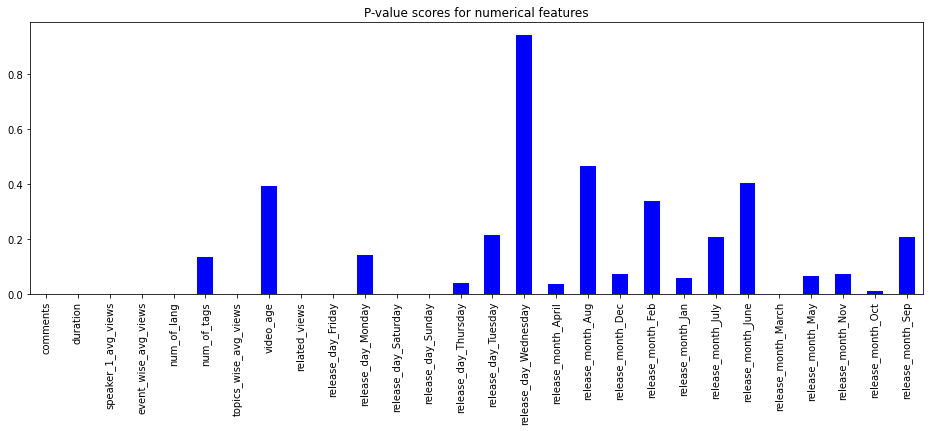

In [ ]:
#The second array contains the p-values that we need it. let's plot it
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

We can drop the features having high p values.

In [ ]:
X.columns

Index(['comments', 'duration', 'speaker_1_avg_views', 'event_wise_avg_views',
       'num_of_lang', 'num_of_tags', 'topics_wise_avg_views', 'video_age',
       'related_views', 'release_day_Friday', 'release_day_Monday',
       'release_day_Saturday', 'release_day_Sunday', 'release_day_Thursday',
       'release_day_Tuesday', 'release_day_Wednesday', 'release_month_April',
       'release_month_Aug', 'release_month_Dec', 'release_month_Feb',
       'release_month_Jan', 'release_month_July', 'release_month_June',
       'release_month_March', 'release_month_May', 'release_month_Nov',
       'release_month_Oct', 'release_month_Sep'],
      dtype='object')

In [ ]:
#We will make a list of important features
ll=['comments', 'duration', 'num_of_lang', 'num_of_tags','event_wise_avg_views',
       'related_views', 'release_day_Friday','speaker_1_avg_views','topics_wise_avg_views']
len(ll)

9

In [ ]:
#take it into variable
X=X[ll]

Let's plot the correlation matrix.

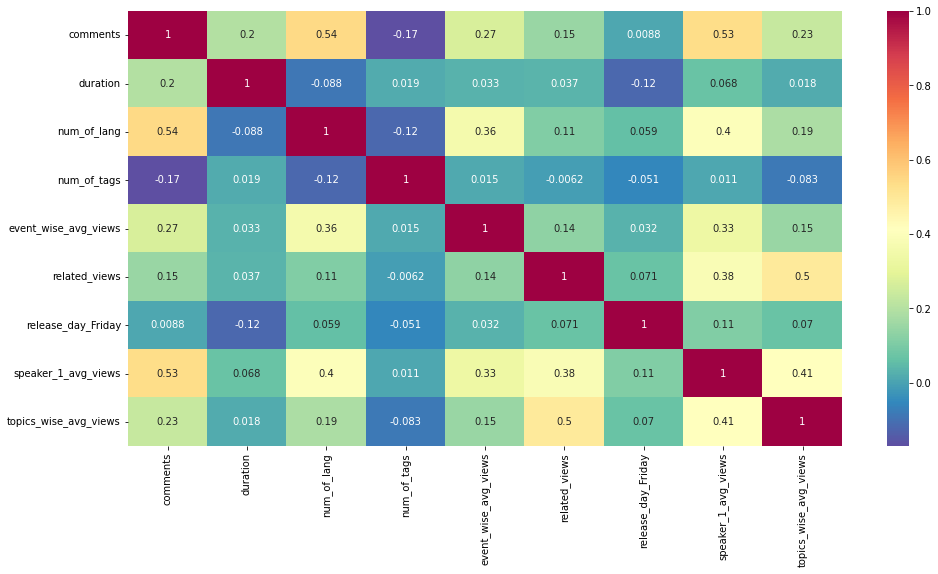

In [ ]:
#plot the correlation matrix
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(X.corr(),annot=True, cmap='Spectral_r')

Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#**7. Fitting the regression models and HyperParameter Tuning**



##**7.1 Let's apply linear regression model.**

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, rather than trying to classify them into categories. There are two main types:

**Simple regression**:

Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction.

**y=mx+b**



**Multivariable regression**:

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

**f(x,y,z)=w1x+w2y+w3z**

In [ ]:
#model fitting
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#predicting the values for train and test set
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE on test is" ,RMSE)

y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE on test is 220218637572.5784
RMSE on test is 469274.5865403095
Training MAE: 271292.79
Test MAE: 264534.91


We can see this model is giving satisfactory score.

##**7.2 Random Forest Regressor**

In [ ]:
#apply the RandomForestRegressor on default parameters
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Target mean: {:0.2f}'.format(y.mean()))
print('Target std: {:0.2f}'.format(y.std()))

Training MAE: 94946.83
Test MAE: 233843.30
Target mean: 1661354.12
Target std: 1102595.71


This is not good score. We can improve this by hyperparameter tuning.



Let's define the Parameter Dict for Hyperparameter Tuning

In [ ]:
#Random Forest Regressor param_dict
n_estimators = [30,50,80,100,120,150]
max_depth = [4,6,8,10,12]
min_samples_split = [50,80,100,150,200]
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

1. Let's perform Hyperparameter Tuning using Randomized Search CV

---



In [ ]:
# Let's create an instance of the random forest regressor
rf_model = RandomForestRegressor(criterion='mae')

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12],
                                        'min_samples_leaf': [10, 30, 40, 50, 60,
                                                             80],
                                        'min_samples_split': [50, 80, 100, 150,
                                                              200],
                                        'n_estimators': [30, 50, 80, 100, 120,
                                                         150]})

In [ ]:
#finding the optimal model w.r.t. best_estimator_
rf_optimal_model = rf_random.best_estimator_

In [ ]:
rf_optimal_model

RandomForestRegressor(criterion='mae', max_depth=12, min_samples_leaf=10,
                      min_samples_split=150, n_estimators=150)

In [ ]:
#calculating the MAE on train and test set
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 195018.49
Test MAE: 199413.04


In [ ]:
# make predictions for test data
y_hat = rf_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.821827251839214
For test set the R_Squared for RFforest is 0.813121585101324 and adjusted R_Squared is 0.8127005824144434


###**Let's plot all the scores of rf_optimal_model together.**

In [ ]:
#Defining the model
model =[
        ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)]
      ]
#We will run the the model and store the results in a dataframe
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_rf = pd.DataFrame(model_data)

#printing the results_df_rf
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,186851.683677,192393.326818,0.806358,0.802771,485164.609387,489517.934412


###**Let's plot the feature importance score w.r.t. RF model**

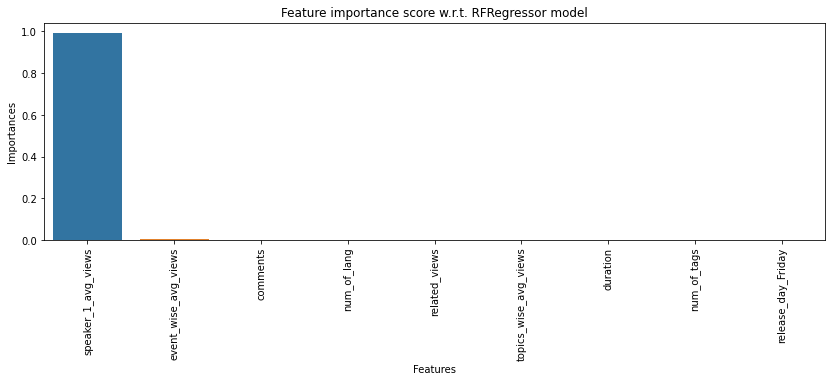

In [ ]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': rf_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. RFRegressor model')
plt.show()

speaker_avg_views is the most important feature in RandomForestregressor followed by event_wise_avg_views.

##**7.3 XGboost regressor model**

In [ ]:
#XGBoost Regressor
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from xgboost import XGBRegressor
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)
#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[10:44:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.3s
[10:44:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.2s
[10:44:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.2s
[10:44:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.2s
[10:44:27] WARNING: /wo

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [ ]:
#finding xgb_optimal_model
xgb_optimal_model = xgb_random.best_estimator_

In [ ]:
xgb_optimal_model

XGBRegressor(max_depth=4, min_samples_leaf=50, min_samples_split=150,
             n_estimators=80)

In [ ]:
# make predictions for test data
y_hat = xgb_optimal_model.predict(X_test)
print(f'r_sqr value for train: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.9184319768620391
For test set the R_Squared for XGBoost is 0.8321815962219277 and adjusted R_Squared is 0.8318035322334414


In [ ]:
y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 163241.11
Test MAE: 224763.57


###**Let's plot all the scores of xgb_optimal_model together.**

In [ ]:
#Defining the model
model = [
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=40,
             min_samples_split=150, n_estimators=80)]         
         ]
#Let's run the the model
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_xgb = pd.DataFrame(model_data)
#printing the results_df_xgb
results_df_xgb

[13:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,XGBRegressor:,164091.332037,226944.860549,0.918158,0.830151,315411.385197,454270.753145


###**Let's plot the feature importance score w.r.t. XGBregressor model**

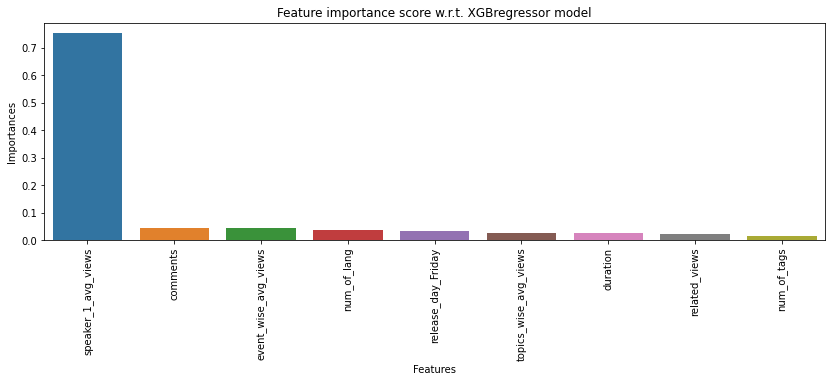

In [ ]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': xgb_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. XGBregressor model')
plt.show()

* **speaker1_avg_views is the most important feature in XGBregressor model followed by event_wise_avg_views.**

##**7.4 ExtraTreesRegressor.**

In [ ]:
et = ExtraTreesRegressor(criterion='mae', max_depth=30, n_estimators=200, min_samples_leaf=2, min_samples_split=6)
et.fit(X_train, y_train)
y_pred = et.predict(X_train)
y_test_pred = et.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 118216.83
Test MAE: 201556.09


**Let's perform Hyperparameter Tuning using Randomized Search CV**

In [ ]:
#Extra Trees Regressor paramdict
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the Extratrees regressor
et_model = ExtraTreesRegressor(criterion='mae')

#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)
et_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=   4.6s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=   4.5s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=   4.6s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=   4.6s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=   4.6s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   6.3s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   6.4s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   6.4s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   6.3s
[CV] END max_depth=6, 

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [ ]:
et_optimal_model = et_random.best_estimator_

In [ ]:
y_pred = et_optimal_model.predict(X_train)
y_test_pred = et_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 201497.09
Test MAE: 201489.90


In [ ]:
# make predictions for test data
y_hat = et_optimal_model.predict(X_test)
print(f'r_sqr value for train: {et_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.7984408080753754
For test the R_Squared for ExtraTreesRegressor is 0.806240256942798 and adjusted R_Squared is 0.8058037518896028


###**Plotting all the scores of et_optimal_model together.**

In [ ]:
#Defining the model
model = [
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='mae',max_depth=6, min_samples_leaf=40,min_samples_split=100, n_estimators=50)],
         ]
#Let's run the the model
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_et = pd.DataFrame(model_data)
#printing the results_df_et
results_df_et

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,ExtraTreeRegressor :,220118.895408,214556.914929,0.796042,0.806636,497920.761315,484696.887856


**Let's plot the feature importance score w.r.t. ExtraTreesRegressor model**

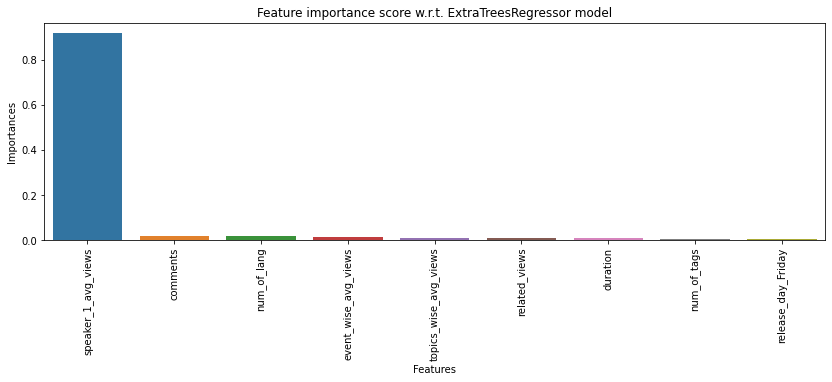

In [ ]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': et.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. ExtraTreesRegressor model')
plt.show()

speaker1_avg_views is the most important feature in RandomForestregressor followed by num_of_lang and comments.

In all the models we cheked, speaker_1_avg_views column is impacting so much.

#**8.Compare the different regressor Models**

##*The ML regressor models that we have used are :*

* Lasso Regressor
* Ridge Regressor
* KNearestNeighbors Regressor
* Random Forest Regressor
* Extra Tree Regressor
* Gradient Boosting Regressor
* XGB Regressor

* **Let's try all these models together and store the scores in a new dataframe.**

In [ ]:
#Defining all these models
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)],
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='mae',max_depth=6, min_samples_leaf=40,min_samples_split=100, n_estimators=50)],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=40,
             min_samples_split=150, n_estimators=80)]          
        ]

In [ ]:
#Let's run all the models and store the scores
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[10:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#printing the results dataframe
results_df = pd.DataFrame(model_data)
results_df

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,Lasso:,271292.538693,264534.493302,0.816026,0.818746,472898.287708,469274.456045
1,Ridge:,271287.372212,264525.554465,0.816026,0.818748,472898.291724,469271.627713
2,KNeighborsRegressor:,231054.636746,281932.195424,0.856594,0.783506,417516.848940,512868.181145
3,RandomForest,186605.126209,191910.559875,0.806218,0.803192,485340.428182,488994.200362
4,ExtraTreeRegressor :,207236.230507,204673.390587,0.796772,0.806601,497028.743503,484741.159212
5,GradientBoostingRegressor:,184748.365612,232542.918830,0.899962,0.830319,348716.258408,454044.960706
6,XGBRegressor:,163241.112787,224763.569788,0.918432,0.832182,314883.354708,451546.487609


#**9. Final selection of the model**


As we know, RMSE is more influenced by outliers MAE doesn't increase with outliers.

MAE is linear and RMSE is quadratically increasing.

So, We chosed MAE as a deciding factor for our model.

 **On the basis of MAE, The best performing regression model is Random Forest Regressor.**


In [ ]:
#let's print the scores of Random Forest Regressor model 
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,186851.683677,192393.326818,0.806358,0.802771,485164.609387,489517.934412


In [ ]:
print(f'Mean value of our target variable is {y.mean()}')

Mean value of our target variable is 1661354.1194756555


 **For the Random Forest Regressor model,We can see MAE is around 12 % of target variable mean.**

#**10. Conclusion**
###That's it! we find out which model is sutiable.
###we have Started with data loading and we have done EDA ,feature engineering , data cleaning, target encoding feature selection and then model building.

###So we have used this models:
* **Ridge Regressor**
* **Lasso Regressor**
* **KNearestNeighbors Regressor**
* **Gradient Boosting Regressor**
* **Random Forest Regressor**
* **Extra Tree Regressor**
* **XGB Regressor**

###As we know, RMSE is more influenced by outliers MAE doesn't increase with outliers.

MAE is linear and RMSE is quadratically increasing.So, We chosed MAE as a deciding factor for our model.

On the basis of MAE, The best performing regression model is Random Forest Regressor.

we have Successfully build a predictive model, which is helps to TED in
predicting the views of the talks uploaded on the TEDx website

TED can increase their views and popularity by increasing videos on
sections like Scienc and Technology.

TED can use topic modelling to tackle views in each topic separately 



